In [42]:
## next code downloads large dataset from pybaseball
## we launched it before to get baseball_data.csv 
# from pybaseball import statcast
## Fetch data for a specific date range
# data = statcast(start_dt='2017-04-01', end_dt='2017-10-01')
## Save to a CSV file
# data.to_csv('baseball_data.csv', index=False)

## then we choose the most listed player and save the data to file
# df.player_name.value_counts()
# columns = ['type', 'plate_x', 'plate_z', 'player_name']
# df_jv = df.loc[df['player_name']=='Verlander, Justin', columns]
# df_jv.to_csv('justin_verlander.csv', index=False)

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Load and investigate the data

In [4]:
df_jv = pd.read_csv('justin_verlander.csv')
print(df_jv.head())

  type  plate_x  plate_z        player_name
0    S    -0.15     3.37  Verlander, Justin
1    S    -0.38     2.83  Verlander, Justin
2    S    -0.28     3.87  Verlander, Justin
3    B     0.38    -0.60  Verlander, Justin
4    B    -0.69    -0.78  Verlander, Justin


In [5]:
df_jv['type'] = df_jv['type'].map({'S': 1, 'B': 0})
df_jv = df_jv.dropna(subset = ['type', 'plate_x', 'plate_z'])

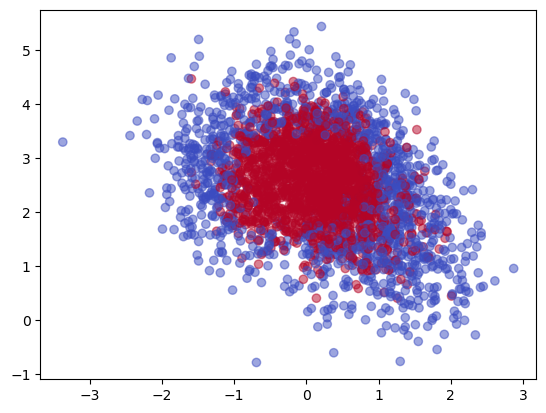

<Figure size 640x480 with 0 Axes>

In [6]:
plt.scatter(x = df_jv['plate_x'], y = df_jv['plate_z'], c = df_jv['type'], cmap = plt.cm.coolwarm, alpha = 0.5)
plt.show()
plt.clf()

## Support Vector Classification

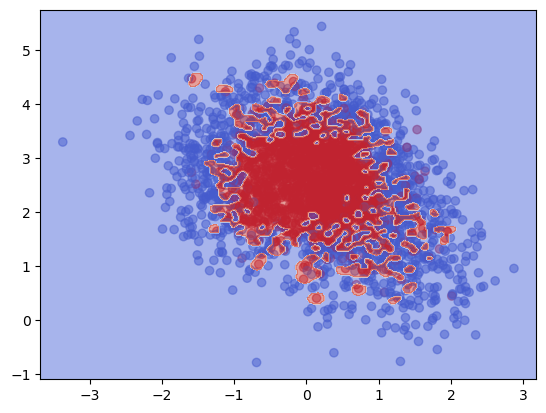

In [52]:
fig, ax = plt.subplots()
plt.scatter(x = df_jv['plate_x'], y = df_jv['plate_z'], c = df_jv['type'], cmap = plt.cm.coolwarm, alpha = 0.5)

features = df_jv[['plate_x','plate_z']]
label = df_jv['type']
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3)

classifier = SVC(kernel='rbf', gamma=100, C=100)
classifier.fit(X_train, y_train)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = classifier.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['plate_x', 'plate_z']))
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

plt.show()

## Hyperparameter tunning gamma and C for Support Vector Classification

In [29]:
svc_classifier = SVC(kernel='rbf')
parameters = {'gamma': np.linspace(0.1,10,20), 'C': np.linspace(0.1,10,20)}
grid = GridSearchCV(svc_classifier, parameters)
grid.fit(X_train, y_train)
# Print best model
print(grid.best_estimator_)
# Print best score
print(grid.best_score_)
# Print the accuracy of the final model on the test data
print(grid.score(X_test, y_test))
hyperparameter_grid = pd.DataFrame(grid.cv_results_['params'])
grid_scores = pd.DataFrame(grid.cv_results_['mean_test_score'], columns = ['score'])
df = pd.concat([hyperparameter_grid, grid_scores], axis = 1)
print(df)

SVC(C=3.2263157894736847, gamma=0.6210526315789474)
0.8406025179856116
0.8501118568232662
        C      gamma     score
0     0.1   0.100000  0.783000
1     0.1   0.621053  0.835319
2     0.1   1.142105  0.837241
3     0.1   1.663158  0.836763
4     0.1   2.184211  0.836285
..    ...        ...       ...
395  10.0   7.915789  0.823800
396  10.0   8.436842  0.821881
397  10.0   8.957895  0.819961
398  10.0   9.478947  0.819961
399  10.0  10.000000  0.818999

[400 rows x 3 columns]


## Support Vector Classification with the best hyperparameters

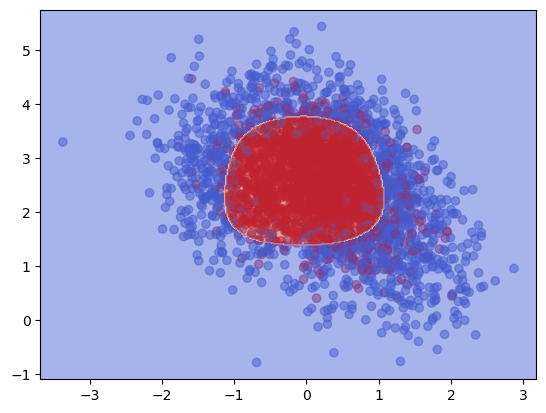

In [53]:
fig, ax = plt.subplots()
plt.scatter(x = df_jv['plate_x'], y = df_jv['plate_z'], c = df_jv['type'], cmap = plt.cm.coolwarm, alpha = 0.5)

classifier = SVC(kernel='rbf', gamma=0.62, C=3.22)
classifier.fit(X_train, y_train)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = classifier.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['plate_x', 'plate_z']))
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

plt.show()